# Números para leer mejor
## Comparación de texto erroneamente atribuído a Borges
### Por: Angela Cristina Villate

![Borges](nubeBorges.png)

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import string

In [4]:
with open('poema de los dones.txt', 'r', encoding='utf-8') as file:
    texto_dones = file.read()

with open('instantes.txt', 'r', encoding='utf-8') as file:
    texto_instantes = file.read()

In [5]:
# Preprocesamiento de los textos
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    # Conversión a minúsculas
    tokens = [word.lower() for word in tokens]
    # Eliminación de stopwords y signos de puntuación
    stop_words = set(stopwords.words('spanish'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

In [7]:
tokens_dones = preprocess_text(texto_dones)
tokens_instantes = preprocess_text(texto_instantes)

In [8]:
# Análisis de frecuencia de palabras
freq_dist_dones = FreqDist(tokens_dones)
freq_dist_instantes = FreqDist(tokens_instantes)

# Las 10 palabras más frecuentes en cada texto
top_words_dones = freq_dist_dones.most_common(20)
top_words_instantes = freq_dist_instantes.most_common(20)

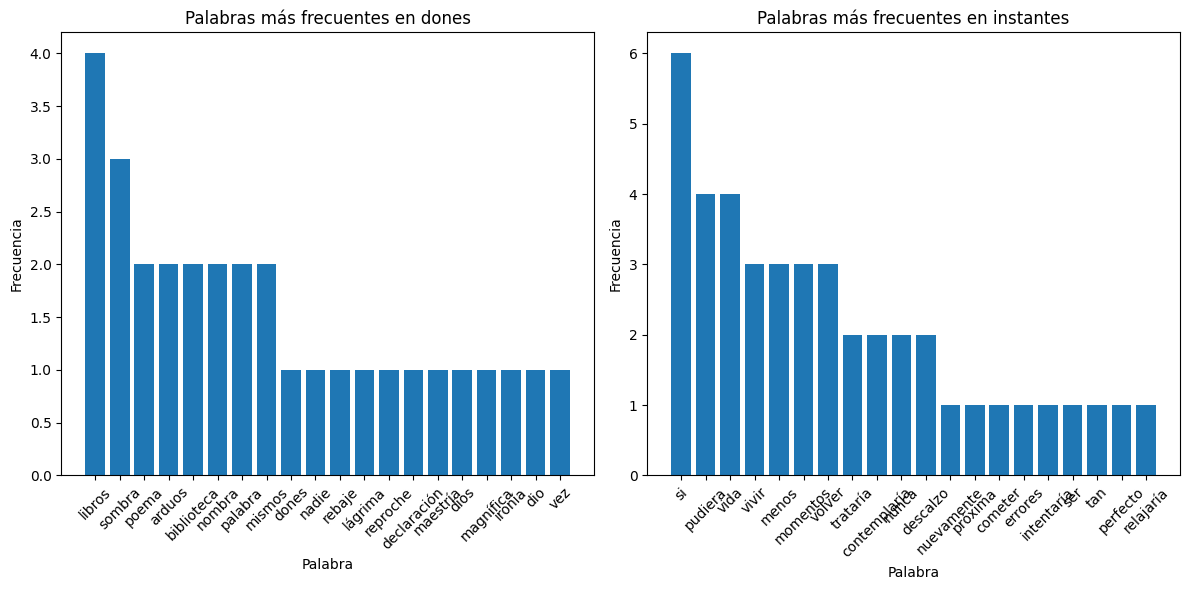

In [9]:
# Visualización de las palabras más frecuentes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(*zip(*top_words_dones))
plt.title('Palabras más frecuentes en dones')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.bar(*zip(*top_words_instantes))
plt.title('Palabras más frecuentes en instantes')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
from nltk.tag import pos_tag

# Las 20 palabras más frecuentes en cada texto
top_words_dones = freq_dist_dones.most_common(20)
top_words_instantes = freq_dist_instantes.most_common(20)

# Etiquetado POS de las palabras más frecuentes
tagged_dones = pos_tag(tokens_dones)
tagged_instantes = pos_tag(tokens_instantes)

# Imprimir las palabras más frecuentes y su categoría gramatical
print("Dones:")
for word, freq in top_words_dones:
    print(f"{word}: {freq} - {nltk.pos_tag([word])[0][1]}")

print("\nInstantes:")
for word, freq in top_words_instantes:
    print(f"{word}: {freq} - {nltk.pos_tag([word])[0][1]}")

Dones:
libros: 4 - NNS
sombra: 3 - NN
poema: 2 - NN
arduos: 2 - NN
biblioteca: 2 - NN
nombra: 2 - NN
palabra: 2 - NN
mismos: 2 - NNS
dones: 1 - NNS
nadie: 1 - NN
rebaje: 1 - NN
lágrima: 1 - NN
reproche: 1 - NN
declaración: 1 - NN
maestría: 1 - NN
dios: 1 - NNS
magnífica: 1 - NN
ironía: 1 - NN
dio: 1 - NN
vez: 1 - NN

Instantes:
si: 6 - NN
pudiera: 4 - NN
vida: 4 - NN
vivir: 3 - NN
menos: 3 - NNS
momentos: 3 - NNS
volver: 3 - NN
trataría: 2 - NN
contemplaría: 2 - NN
nunca: 2 - NN
descalzo: 2 - NN
nuevamente: 1 - NN
próxima: 1 - NN
cometer: 1 - NN
errores: 1 - NNS
intentaría: 1 - NN
ser: 1 - NN
tan: 1 - NN
perfecto: 1 - NN
relajaría: 1 - NN


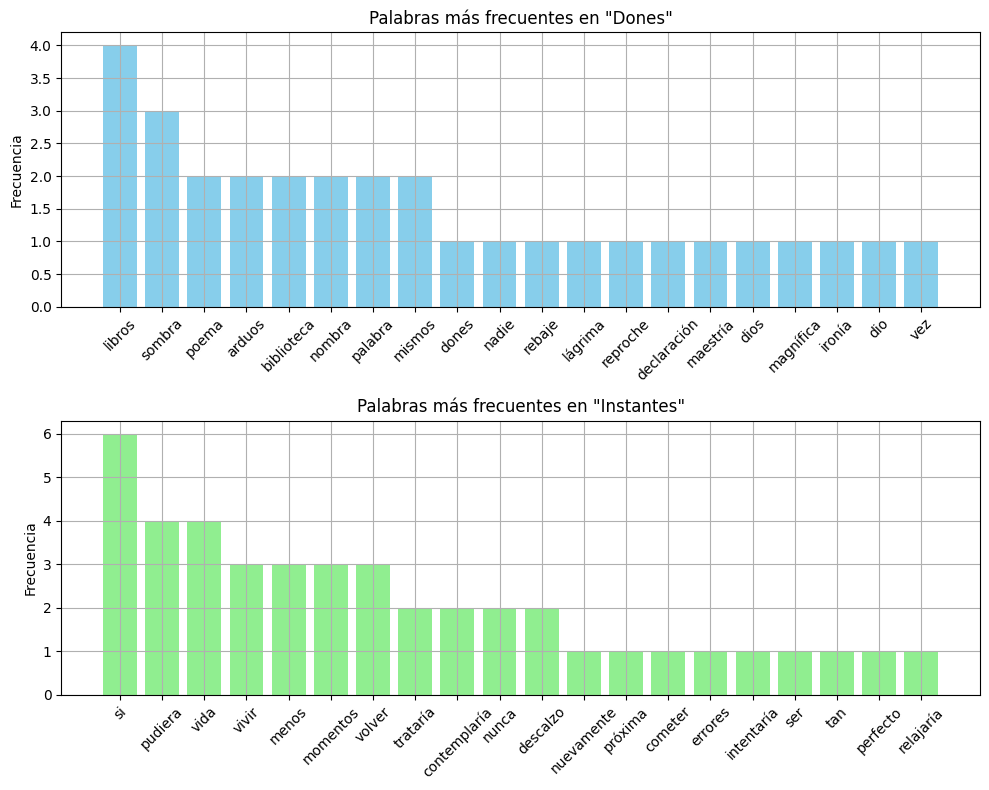

In [12]:
# Crear gráficas de barras
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].bar([word for word, _ in top_words_dones], [freq for _, freq in top_words_dones], color='skyblue')
axes[0].set_title('Palabras más frecuentes en "Dones"')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

axes[1].bar([word for word, _ in top_words_instantes], [freq for _, freq in top_words_instantes], color='lightgreen')
axes[1].set_title('Palabras más frecuentes en "Instantes"')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()

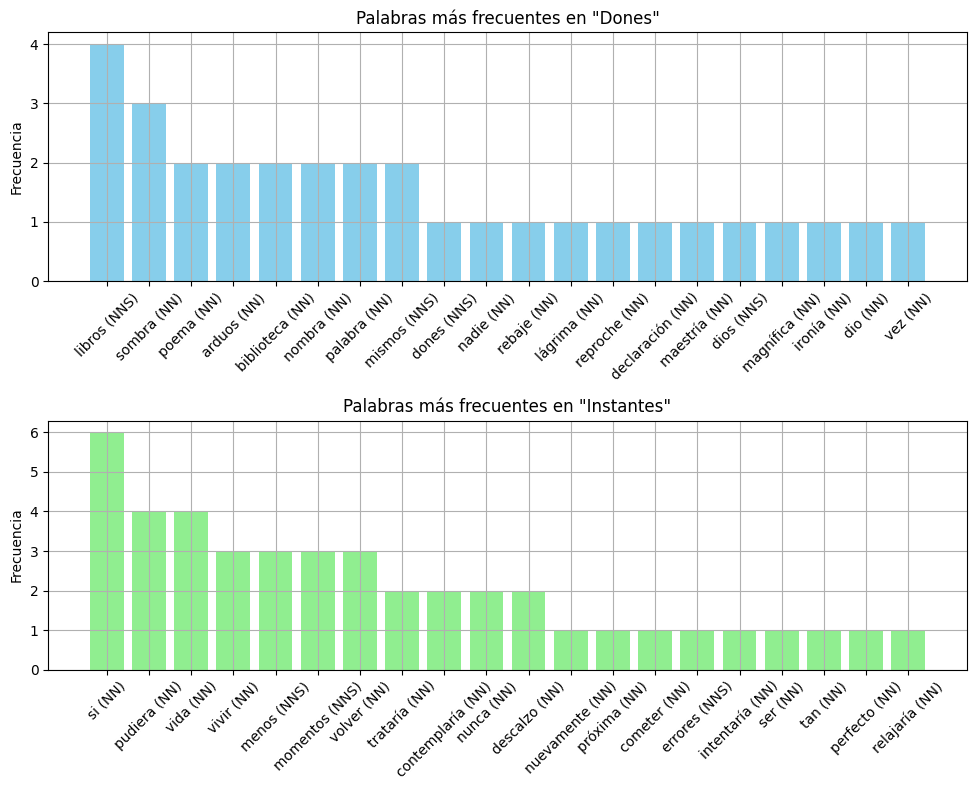

In [14]:
# Etiquetado POS de las palabras más frecuentes
tagged_dones = pos_tag(tokens_dones)
tagged_instantes = pos_tag(tokens_instantes)

# Obtener las palabras y sus categorías gramaticales
words_pos_dones = [(word, nltk.pos_tag([word])[0][1]) for word, _ in top_words_dones]
words_pos_instantes = [(word, nltk.pos_tag([word])[0][1]) for word, _ in top_words_instantes]

# Crear gráficas de barras
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].bar([f"{word} ({pos})" for word, pos in words_pos_dones], [freq for _, freq in top_words_dones], color='skyblue')
axes[0].set_title('Palabras más frecuentes en "Dones"')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

axes[1].bar([f"{word} ({pos})" for word, pos in words_pos_instantes], [freq for _, freq in top_words_instantes], color='lightgreen')
axes[1].set_title('Palabras más frecuentes en "Instantes"')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


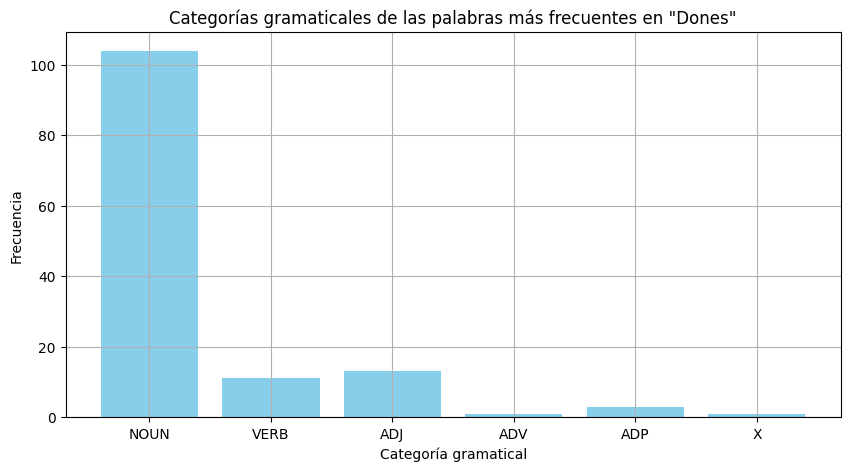

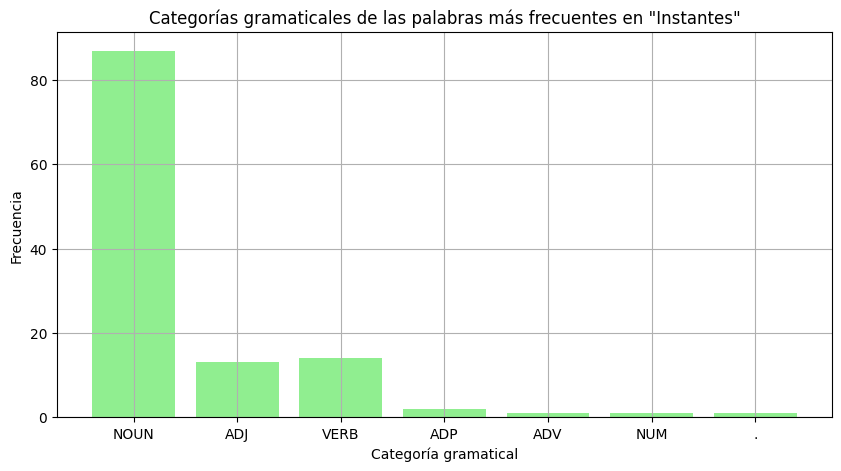

In [20]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tag import pos_tag
import matplotlib.pyplot as plt
import nltk
nltk.download('universal_tagset')

# Etiquetado POS de las palabras más frecuentes
tagged_dones = pos_tag(tokens_dones, tagset='universal')
tagged_instantes = pos_tag(tokens_instantes, tagset='universal')

# Conteo de las categorías gramaticales de las palabras más frecuentes
categories_dones = nltk.FreqDist(tag for (word, tag) in tagged_dones)
categories_instantes = nltk.FreqDist(tag for (word, tag) in tagged_instantes)

# Crear gráfico de barras para las categorías gramaticales de "Dones"
plt.figure(figsize=(10, 5))
plt.bar(categories_dones.keys(), categories_dones.values(), color='skyblue')
plt.title('Categorías gramaticales de las palabras más frecuentes en "Dones"')
plt.xlabel('Categoría gramatical')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Crear gráfico de barras para las categorías gramaticales de "Instantes"
plt.figure(figsize=(10, 5))
plt.bar(categories_instantes.keys(), categories_instantes.values(), color='lightgreen')
plt.title('Categorías gramaticales de las palabras más frecuentes en "Instantes"')
plt.xlabel('Categoría gramatical')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [22]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Crear un objeto SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Textos en español
dones = texto_dones
instantes = texto_instantes

# Función para realizar análisis de sentimientos
def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Analizar sentimientos de "Dones"
sentiment_dones = analyze_sentiment(dones)

# Analizar sentimientos de "Instantes"
sentiment_instantes = analyze_sentiment(instantes)

# Imprimir resultados
print("Sentimiento de 'Dones':", sentiment_dones)
print("Sentimiento de 'Instantes':", sentiment_instantes)

Sentimiento de 'Dones': {'neg': 0.049, 'neu': 0.951, 'pos': 0.0, 'compound': -0.9254}
Sentimiento de 'Instantes': {'neg': 0.046, 'neu': 0.944, 'pos': 0.01, 'compound': -0.7845}


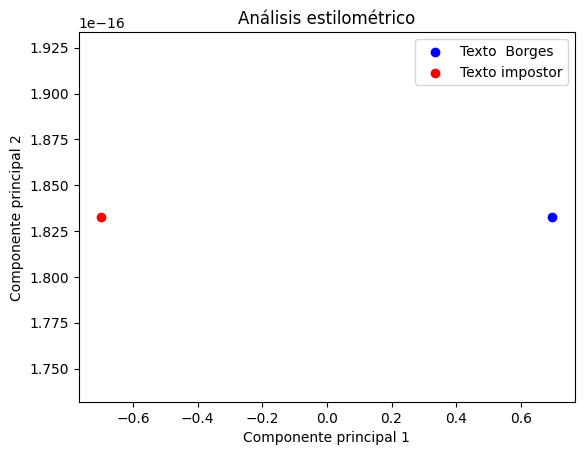

In [26]:
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np

# Textos de Borges y texto falsamente atribuido
texto_borges = texto_dones
texto_impostor = texto_instantes

# Preprocesamiento de los textos
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stopwords.words('spanish')]
    return ' '.join(tokens)

texto_borges_preprocesado = preprocess(texto_borges)
texto_desconocido_preprocesado = preprocess(texto_desconocido)

# Extracción de características usando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([texto_borges_preprocesado, texto_desconocido_preprocesado])

# Análisis de componentes principales (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Visualización de los resultados
# El texto originalmente atribuido a Borges se representará en azul y el texto desconocido en rojo
import matplotlib.pyplot as plt

plt.scatter(X_pca[0, 0], X_pca[0, 1], color='blue', label='Texto  Borges')
plt.scatter(X_pca[1, 0], X_pca[1, 1], color='red', label='Texto impostor')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend()
plt.title('Análisis estilométrico')
plt.show()

Varianza explicada por el componente 1: 1.00
Varianza explicada por el componente 2: 0.00


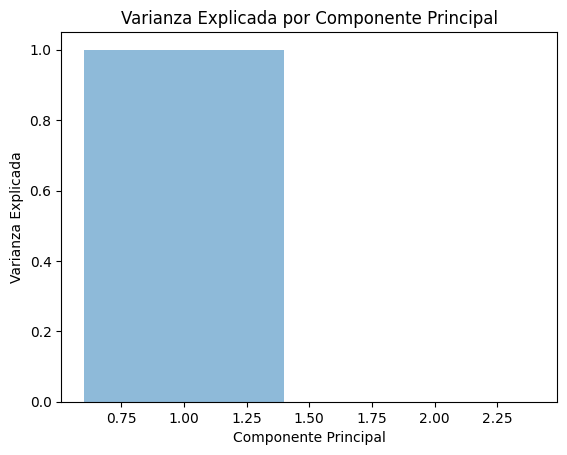

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supongamos que X es tu matriz de características

# Convertir la matriz dispersa a una matriz densa
X_dense = X.toarray()

# Estandarizar los datos (opcional pero recomendado para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dense)

# Crear un objeto PCA
pca = PCA(n_components=2)

# Ajustar PCA a tus datos
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Imprimir la varianza explicada por cada componente
for i, var in enumerate(explained_variance):
    print(f"Varianza explicada por el componente {i+1}: {var:.2f}")

# Gráfico de la varianza explicada
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()